In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

In [11]:
amsterdam = pd.read_csv('datasets/amsterdam-attraction.csv')

amsterdam = amsterdam.dropna()
amsterdam.head()
X=amsterdam.loc[:,['lat','lng']]
X = X.dropna()
X

,lat,lng
0,52.352237,4.987965
1,52.353174,5.004712
2,52.357249,4.995746
3,52.350179,5.005388
4,52.355692,4.994743
...,...,...
1244,52.361074,4.932156
1245,52.406896,4.966979
1246,52.383556,4.965423
1247,52.392920,4.993581


In [27]:
#run KMeans
id_n=8
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
cluster = pd.DataFrame()
id_label=kmeans.labels_


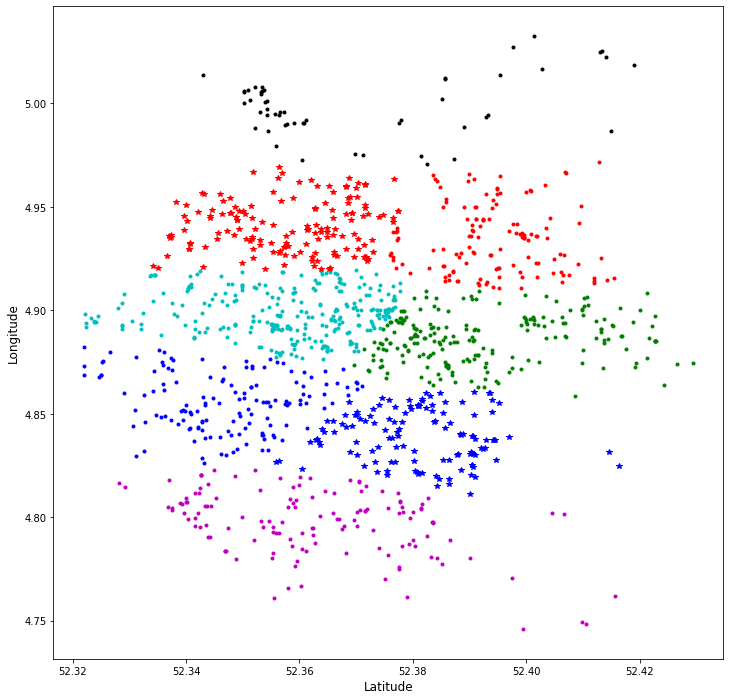

In [28]:
#plot result
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.lat[cluster].values,X.lng[cluster].values,ptsymb[i])
plt.show()

In [29]:
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d